In [21]:
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# target = "SI.DST.10TH.10"   # Top 10% wealth share
# target = "SI.DST.FRST.10"   # Bottom 10% wealth share
target = "SI.POV.GINI"        # Gini index
features_to_cluster = ['SI.SPR.PGAP', 'SI.POV.GAPS', 'SH.HIV.INCD.ZS', 'TM.VAL.MRCH.R3.ZS', 'SI.POV.SOPO', 'TX.VAL.MRCH.R3.ZS', 'EN.URB.MCTY.TL.ZS']

In [10]:
df = pd.read_csv('input/imputed/df_wide_knn_imputed.csv')
X = df[features_to_cluster].values
y = df[target].values

In [25]:
df

Country Name Country Code        Year  AG.CON.FERT.PT.ZS  \
0      Afghanistan          AFG  1960-12-31         169.482677   
1      Afghanistan          AFG  1961-12-31         169.482677   
2      Afghanistan          AFG  1962-12-31         154.612720   
3      Afghanistan          AFG  1963-12-31         169.482677   
4      Afghanistan          AFG  1964-12-31         140.824441   
...            ...          ...         ...                ...   
16955     Zimbabwe          ZWE  2019-12-31         623.474178   
16956     Zimbabwe          ZWE  2020-12-31         212.474438   
16957     Zimbabwe          ZWE  2021-12-31         212.474438   
16958     Zimbabwe          ZWE  2022-12-31         212.474438   
16959     Zimbabwe          ZWE  2023-12-31         178.528224   

       AG.CON.FERT.ZS  AG.LND.AGRI.K2  AG.LND.AGRI.ZS  AG.LND.ARBL.HA  \
0            0.368527        304010.0       48.045438       6258800.0   
1            0.143791        377500.0       57.878356       7650000.0   
2            0.142857        378000.0       57.955016       7700000.0   
3            0.141935        378500.0       58.031676       7750000.0   
4            0.141026        379050.0       58.116002       7800000.0   
...               ...             ...             ...             ...   
16955       42.386111        162000.0       39.518358       4000000.0   
16956       32.278234        162000.0       39.754073       4000000.0   
16957       33.771180        162000.0       39.385906       4000000.0   
16958       33.330587        652334.2       39.489284        790800.0   
16959        5.329281        387125.4       20.888956       2076400.0   

       AG.LND.ARBL.HA.PC  AG.LND.ARBL.ZS  ...  per_sa_allsa.cov_q4_tot  \
0               0.711829        9.993392  ...                 7.989241   
1               0.830251       11.728991  ...                13.176795   
2               0.818765       11.805651  ...                13.732309   
3               0.806915       11.882311  ...                14.124943   
4               0.794757       11.958972  ...                16.365778   
...                  ...             ...  ...                      ...   
16955           0.261928        8.099009  ...                18.893734   
16956           0.257618        8.320764  ...                23.966720   
16957           0.253209        7.952922  ...                17.600192   
16958           0.208019        8.058050  ...                14.779136   
16959           0.303074        7.243223  ...                25.218900   

       per_sa_allsa.cov_q5_tot  per_si_allsi.adq_pop_tot  \
0                     8.398409                 23.078377   
1                     9.670584                 23.078377   
2                    14.502483                 24.901190   
3                    15.673807                 16.812306   
4                    18.613634                 30.746205   
...                        ...                       ...   
16955                14.565084                 15.862261   
16956                17.178579                 18.734331   
16957                13.229630                 19.516204   
16958                11.749071                 19.621247   
16959                19.076560                 28.267639   

       per_si_allsi.ben_q1_tot  per_si_allsi.cov_pop_tot  \
0                     3.167946                  5.455467   
1                     3.167946                  5.455467   
2                     3.159402                  1.914410   
3                     2.718928                  5.639137   
4                     2.832776                  2.782943   
...                        ...                       ...   
16955                 5.703138                  4.807448   
16956                 3.743640                  2.749071   
16957                 1.436439                  2.194031   
16958                 4.156095                  9.177899   
16959                 3.773267                  1.509818   

     

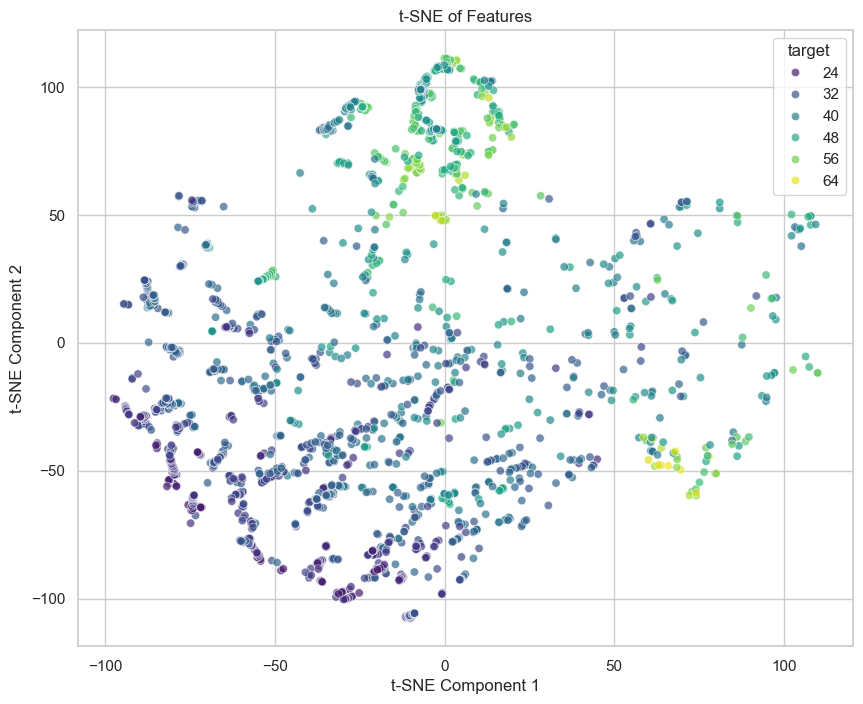

In [26]:
# t-SNE

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame with t-SNE results
df_tsne = pd.DataFrame(data=X_tsne, columns=['tSNE1', 'tSNE2'])
df_tsne['target'] = y
df_tsne['Country Name'] = df['Country Name']


# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='target', palette='viridis', alpha=0.7)
plt.title('t-SNE of Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

For n_clusters = 2, the silhouette score is: 0.40944508059411433
For n_clusters = 3, the silhouette score is: 0.44478291872312287
For n_clusters = 4, the silhouette score is: 0.44952283037129664
For n_clusters = 5, the silhouette score is: 0.3230265133887693
For n_clusters = 6, the silhouette score is: 0.36768634851184795
For n_clusters = 7, the silhouette score is: 0.3807211076946748
For n_clusters = 8, the silhouette score is: 0.30560185477309093
For n_clusters = 9, the silhouette score is: 0.3072603347065912
For n_clusters = 10, the silhouette score is: 0.3047629170518979


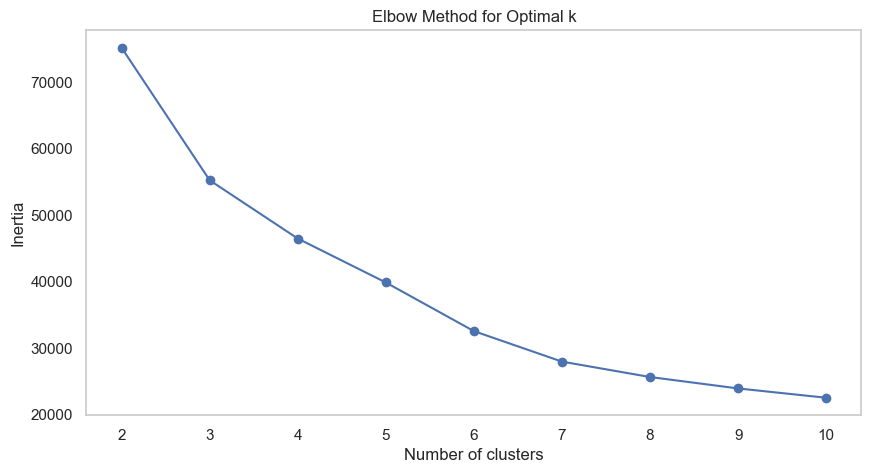

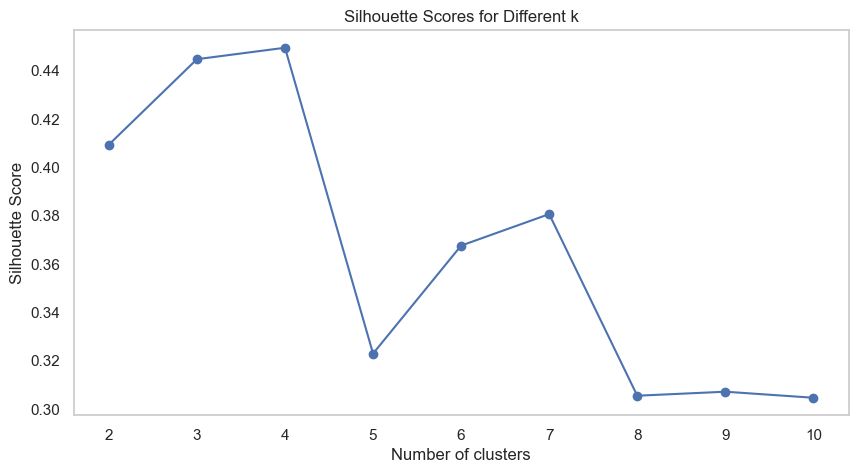

In [19]:
# KMeans clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plot the elbow method
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

In [27]:
# Choose the optimal number of clusters
optimal_n_clusters = 4
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df_tsne['Cluster'] = kmeans.labels_ + 1


fig = px.scatter(df_tsne, x='tSNE1', y='tSNE2', color='Cluster', hover_data=['target', 'Country Name'],
                 color_continuous_scale=px.colors.sequential.Viridis, title='t-SNE Clustering')
fig.show()